## 0. Mount Google Drive and Load Data

In [1]:
!ls -al
! mkdir prognostic

from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/My\ Drive/MLProjects/Prognostic/data/* /content/prognostic
! ls -al /content/prognostic

total 16
drwxr-xr-x 1 root root 4096 Aug 22 16:14 .
drwxr-xr-x 1 root root 4096 Aug 25 03:43 ..
drwxr-xr-x 1 root root 4096 Aug 22 16:14 .config
drwxr-xr-x 1 root root 4096 Aug 22 16:14 sample_data
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
total 43904
drwxr-xr-x 2 root root     4096 Aug 25 03:49 .
drwxr-xr-x 1 root root     4096 Aug 25 03:49 ..
-rw------- 1 root root      429 Aug 25 03:49 RUL_FD001.txt
-rw------- 1 root root     1110 Aug 25 03:49 RUL_FD002.txt
-rw------- 1 root root      428 Aug 25 03

## 1. Predictive Maintenance








We will arrange this notebook in following sections

1. Problem Statement
2. Dataset Overview - Describe Dataset and Initial Sanity Checks
3. Data Preprocessing and Feature Engineering
4. Exploratory Data Analysis and Data Clustering
5. Regression
6. Classification

More description to be added

## 2. Dataset Overview

### 2.1 Data Load and Initial Sanity Check

Let's load the dataset and look at the columns and do some initial data sanity checks - i.e. null data, data types related transformation


In [2]:
from IPython.display import display # Allows the use of display() for DataFrames

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Defining the Column Names to be used to import Training and Test Datasets into Datafram
col_names = ['id','cycle','setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21', 's22', 's23' ]

df_train = pd.read_csv("prognostic/train_FD001.txt", sep=" ", header=None, names=col_names)
df_train.drop(['s22', 's23'], inplace=True, axis=1)

df_test=pd.read_csv("prognostic/test_FD001.txt", sep=" ", header=None, names=col_names)
df_test.drop(['s22', 's23'], inplace=True, axis=1)


display(df_train.head(3))
display(df_test.head(3))

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166


In [3]:
#Loading the Ground Truth data for the Test Dataset i.e. the RUL data for the test dataset.
df_rul = pd.read_csv("prognostic/RUL_FD001.txt", sep=" ", header=None)
df_rul.drop([1], inplace=True, axis=1)
df_rul.columns = ['rul']
df_rul.head(3)

,rul
0,112
1,98
2,69


In [4]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
id          20631 non-null int64
cycle       20631 non-null int64
setting1    20631 non-null float64
setting2    20631 non-null float64
setting3    20631 non-null float64
s1          20631 non-null float64
s2          20631 non-null float64
s3          20631 non-null float64
s4          20631 non-null float64
s5          20631 non-null float64
s6          20631 non-null float64
s7          20631 non-null float64
s8          20631 non-null float64
s9          20631 non-null float64
s10         20631 non-null float64
s11         20631 non-null float64
s12         20631 non-null float64
s13         20631 non-null float64
s14         20631 non-null float64
s15         20631 non-null float64
s16         20631 non-null float64
s17         20631 non-null int64
s18         20631 non-null int64
s19         20631 non-null float64
s20         20631 non-null float64
s21         20631 non-nu

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13096 entries, 0 to 13095
Data columns (total 26 columns):
id          13096 non-null int64
cycle       13096 non-null int64
setting1    13096 non-null float64
setting2    13096 non-null float64
setting3    13096 non-null float64
s1          13096 non-null float64
s2          13096 non-null float64
s3          13096 non-null float64
s4          13096 non-null float64
s5          13096 non-null float64
s6          13096 non-null float64
s7          13096 non-null float64
s8          13096 non-null float64
s9          13096 non-null float64
s10         13096 non-null float64
s11         13096 non-null float64
s12         13096 non-null float64
s13         13096 non-null float64
s14         13096 non-null float64
s15         13096 non-null float64
s16         13096 non-null float64
s17         13096 non-null int64
s18         13096 non-null int64
s19         13096 non-null float64
s20         13096 non-null float64
s21         13096 non-nu

None

We can see that both the train and test dataset doesnt have any null values, and all of them are numeric datatypes so no adjustements are required. This way we can conclude the data load and initial sanity checks.

We will now proceed to futher analyze data and look at the sensor values, data distribution and scaling of the individual features

### 2.2 Let's now look at the plot of the features for one of the engines to develop some intuitions before we dig deeper into the analysis.

From the explanation of the dataset provided by the source, we already know that id, cycle, setting 1, setting 2 and setting 3 are some of the engine identifiers and the operational configurations and not really the sensor data so we will ignore these while performing analysis on the Sensor Data / Features

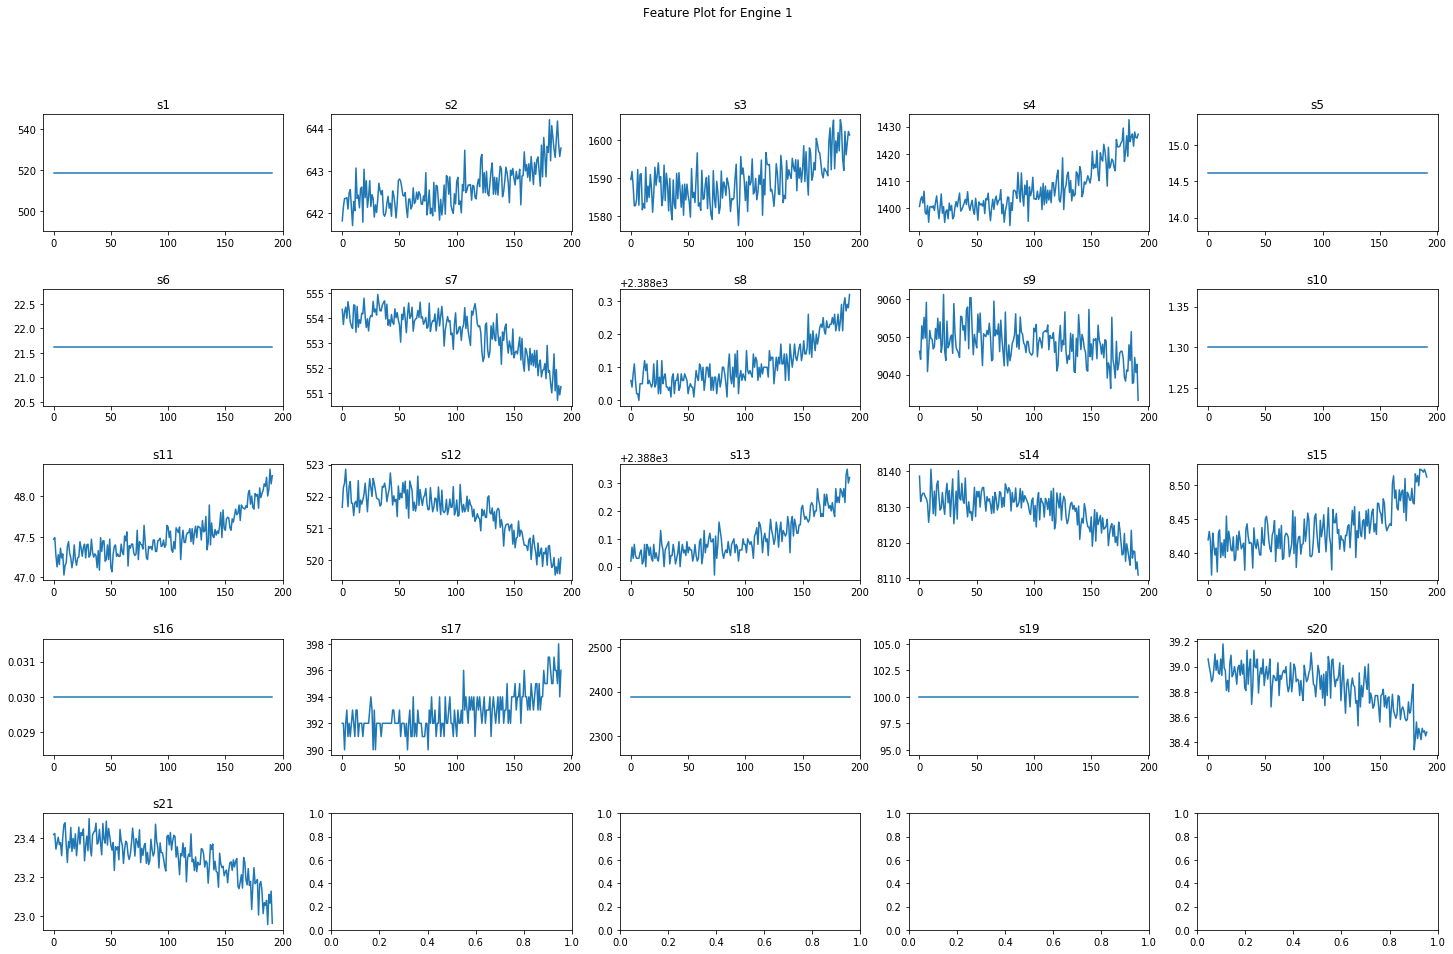

In [5]:
sensor_features = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20', 's21']

#Data Frame for Engine 1
df_e1 = df_train[df_train['id']==1]

#Let's plot the sensors for this enigne
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Feature Plot for Engine 1")

for ax, feat_name in zip(axes.flatten(), sensor_features):
  ax.plot(df_e1[feat_name])
  ax.set_title(feat_name)

So this tell's me that sensors s1, s5, s6, s10, s16, s18, s19 are almost constants across the various cycles for the turbine engine #1. As such these senors may not have a major role in the learning model which we will create

Let's verify the range of these senors for all the training data we have and check if the constant value is only for engine 1 or is this the case for all the engines.

In [6]:
cons_sensors = ['s1', 's5' , 's6', 's10', 's16', 's18', 's19']
display(df_train[cons_sensors].describe().T)

,count,mean,std,min,25%,50%,75%,max
s1,20631.0,518.670000,6.537152e-11,518.67,518.67,518.67,518.67,518.67
s5,20631.0,14.620000,3.394700e-12,14.62,14.62,14.62,14.62,14.62
s6,20631.0,21.609803,1.388985e-03,21.60,21.61,21.61,21.61,21.61
s10,20631.0,1.300000,4.660829e-13,1.30,1.30,1.30,1.30,1.30
s16,20631.0,0.030000,1.556432e-14,0.03,0.03,0.03,0.03,0.03
s18,20631.0,2388.000000,0.000000e+00,2388.00,2388.00,2388.00,2388.00,2388.00
s19,20631.0,100.000000,0.000000e+00,100.00,100.00,100.00,100.00,100.00


As we can see the minimum and maximum value for these sensors is constant. We will thus ignore these sensor readings from our analysis

Droping these columns from the original training and test dataframe, and updating the feature selection list

In [7]:
df_train.drop(cons_sensors, inplace=True, axis=1)
df_train.head(3)

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442


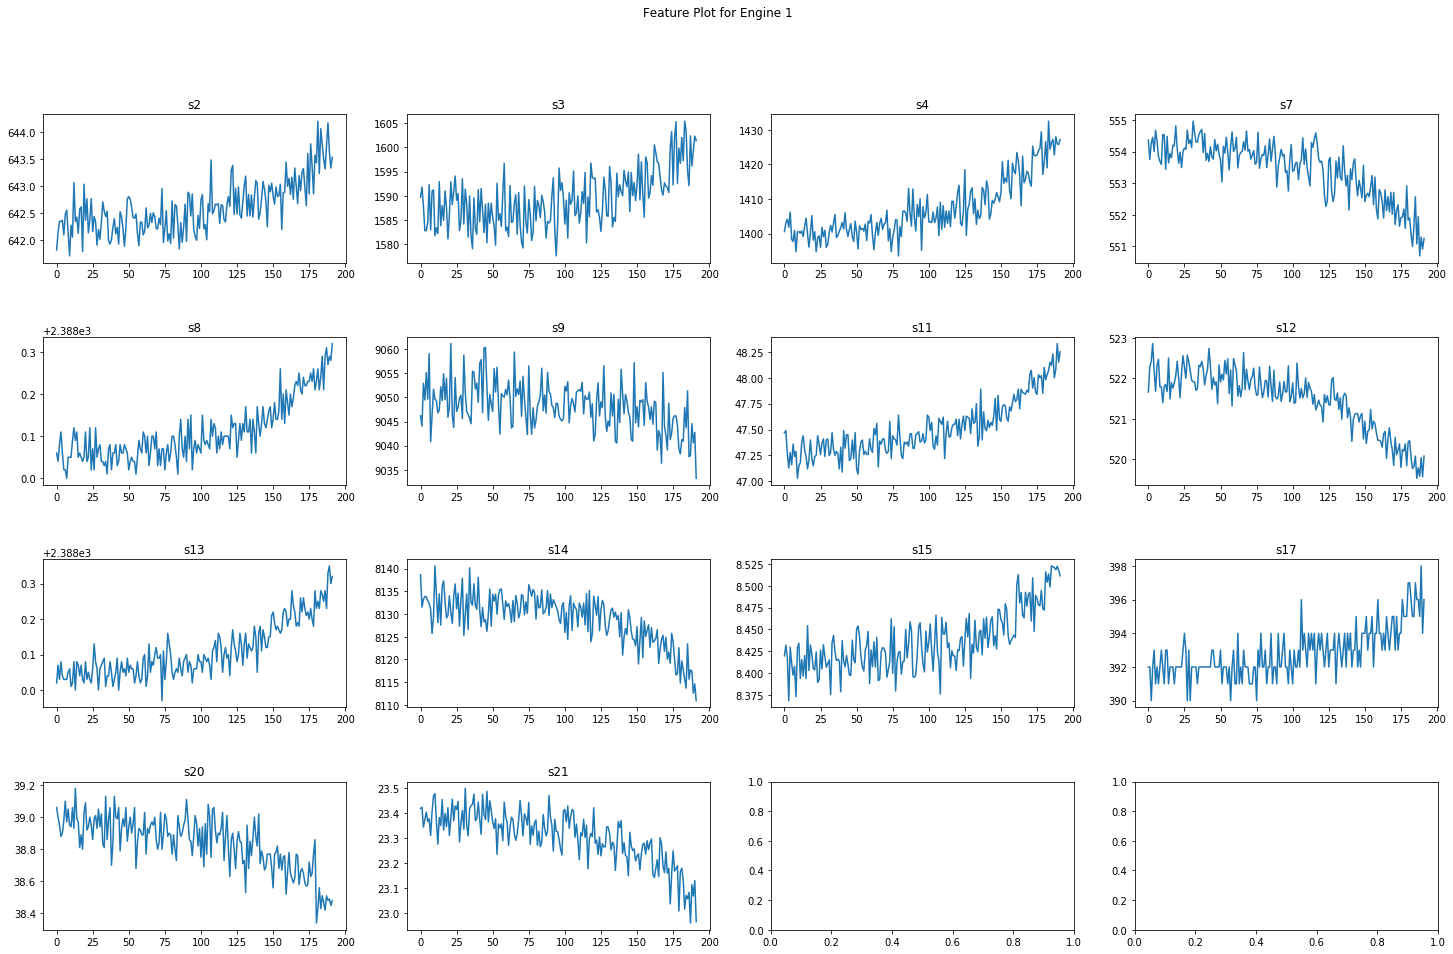

In [8]:
#Let's have a quick look at the engine 1 data with the updated sensor list
sensor_features = ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']

#Data Frame for Engine 1
df_e1 = df_train[df_train['id']==1]

#Let's plot the sensors for this enigne
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Feature Plot for Engine 1")

for ax, feat_name in zip(axes.flatten(), sensor_features):
  ax.plot(df_e1[feat_name])
  ax.set_title(feat_name)

In [9]:
# Let's drop the constant columns from the Test Dataset as well, as we anyways will not be using these features in our analysis and predictions
df_test.drop(cons_sensors, inplace=True, axis=1)
display(df_test.head(3))

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21
0,1,1,0.0023,0.0003,100.0,643.02,1585.29,1398.21,553.90,2388.04,9050.17,47.2,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,641.71,1588.45,1395.42,554.85,2388.01,9054.42,47.5,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,642.46,1586.94,1401.34,554.11,2388.05,9056.96,47.5,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166


We will now proceed with the Data Preprocessing and Feature Engineering. One thing to be noted is that there is a random noise in the sensor data introcued by the CMAPSS Simulator - so among other things we will also look to smoothen the sensor data series.

As a summary
- We have dropped the constant columns from the training and test dataset, and
- We know that smoothening of the time series data is required. 
- df_train and df_test are the updated DataFrames that we will use moving forward - the constant sensor data has been remove from these dataframe (and they contain the id, cycle and operation settings)
- cons_features -> is the list containing the sensor's which were removed
- sensor_features -> is the updated list of sensor's which will be used for analysis

## 3. Data Preprocessing and Feature Engineering

### 3.1 Smoothening the Sensor Data - Adding the Rolling Mean and Rolling Standard Deviation Features

In [0]:
def add_features(df_in, features, win):
  """
  Add rolling average and rolling standard deviation for sensors reading using the fixed rolling window size
  
  Args:
    df_in (dataframe)         : The input dataframe to be processed (training or test)
    rolling_win_size (int)    : The size of the rolling window
    features (list)           : List of features for which the rolling features will be calculated
    
  Returns:
    dataframe : contains the input dataframe with additional rolling mean and rolling standard deviation for each feature
  
  """
  
  features_rolling_mean = [n+'_av' for n in features]
  features_rolling_std = [n+'_std' for n in features]
  
  df_out = pd.DataFrame()
  
  ws = win
  #calculating rollings statistics for each machine id
  for m_id in pd.unique(df_in['id']):
    #get a subset of sensors data for each engine
    df_engine = df_in[df_in['id']==m_id]
    df_sub = df_engine[features]
    
    #get rolling mean for the subset
    av = df_sub.rolling(ws, min_periods=1).mean()
    av.columns = features_rolling_mean
    
    #get rolling standard deviation for the subset
    std = df_sub.rolling(ws, min_periods=1).std().fillna(0)
    std.columns = features_rolling_std
    
    #combining the newly calculated features to the engine subset
    new_ftrs = pd.concat([df_engine, av, std], axis = 1)
    
    #adding the new_ftrs and the original engine data as rows to output dataframe
    df_out = pd.concat([df_out, new_ftrs])
  
  return df_out

In [11]:
#Add extracted features to the training data
df_train_fx_rolling = add_features(df_train, sensor_features, 3)
df_train_fx_rolling.head()

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.66,2388.020,8138.620000,8.419500,392.000000,39.060000,23.419000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,641.985000,1590.760000,1401.870000,554.055000,2388.050000,9045.130000,47.480000,521.97,2388.045,8135.055000,8.425650,392.000000,39.030000,23.421300,0.233345,1.499066,1.796051,0.431335,0.014142,1.499066,0.014142,0.438406,0.035355,5.041671,0.008697,0.000000,0.042426,0.003253
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,642.106667,1589.836667,1402.646667,554.123333,2388.060000,9047.733333,47.410000,522.12,2388.040,8134.446667,8.423033,391.333333,39.003333,23.395600,0.267644,1.918654,1.850009,0.327159,0.020000,4.632023,0.121655,0.404475,0.026458,3.717450,0.007640,1.154701,0.055076,0.044573
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,642.283333,1587.533333,1403.070000,554.153333,2388.076667,9048.830000,47.296667,522.52,2388.060,8132.850000,8.405933,391.333333,38.943333,23.380567,0.115470,4.532288,1.166576,0.361985,0.035119,4.470582,0.181475,0.302655,0.026458,1.215401,0.033419,1.154701,0.060277,0.040118
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,642.356667,1584.543333,1404.096667,554.236667,2388.083333,9052.523333,47.226667,522.49,2388.050,8133.620000,8.405133,391.666667,38.910000,23.374167,0.011547,2.985052,2.176840,0.225906,0.025166,2.857872,0.083865,0.340441,0.026458,0.338083,0.032507,1.527525,0.036056,0.030101


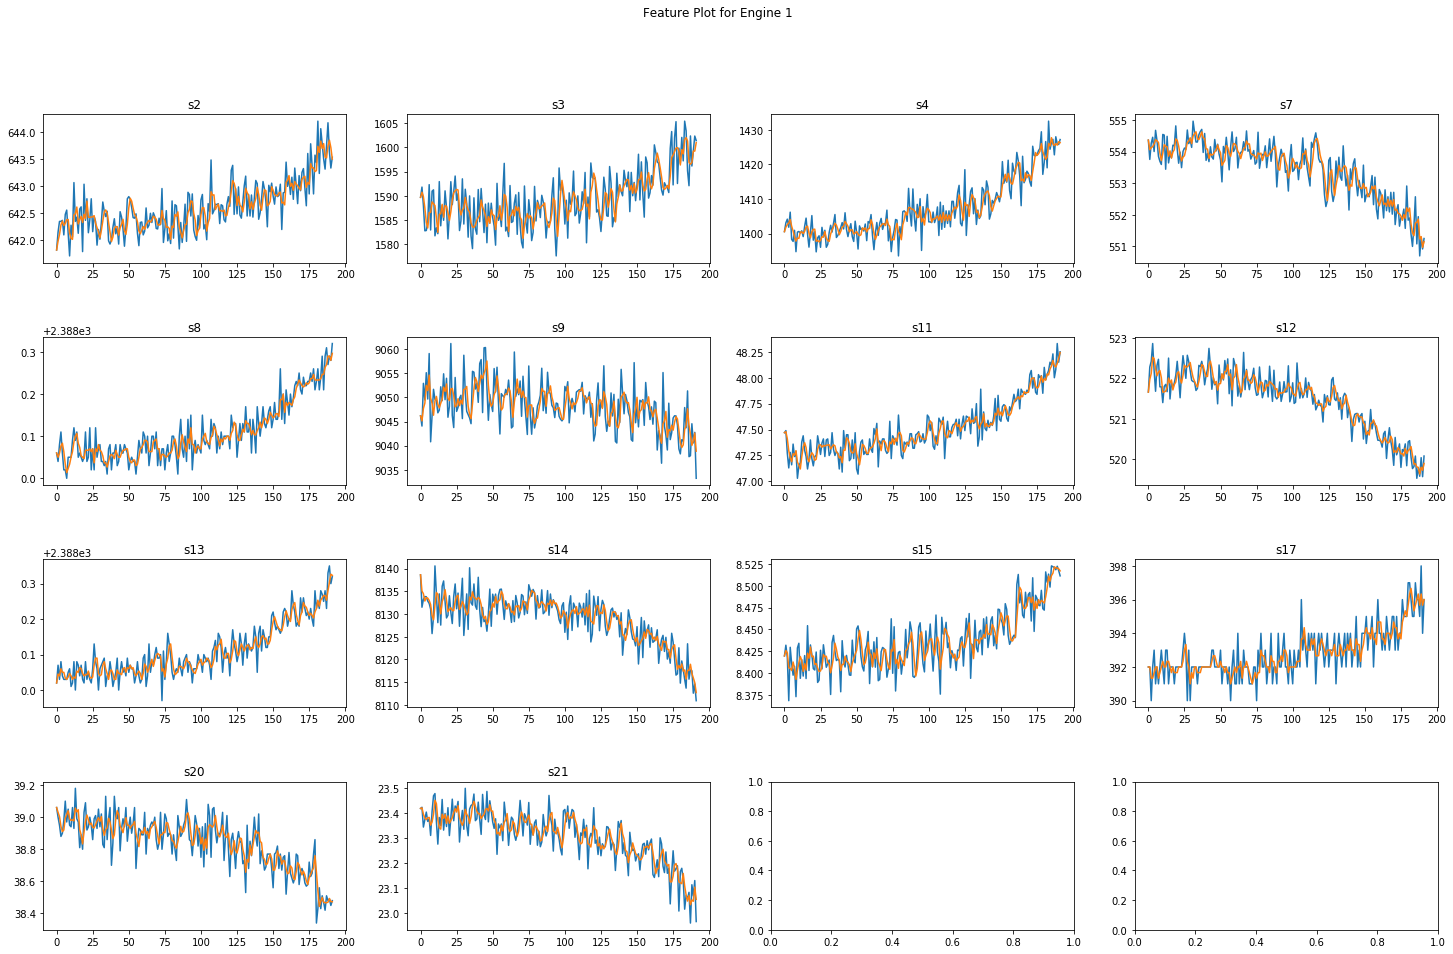

In [12]:
# Let's observe the smoothness in the data to ensure there is noting out of the ordinary.

#Let's have a quick look at the engine 1 data with the updated sensor list
sensor_features_avg = [n+'_av' for n in sensor_features]

#Data Frame for Engine 1
df_e1 = df_train_fx_rolling[df_train_fx_rolling['id']==1]

#Let's plot the sensors for this enigne
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(25,15))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Feature Plot for Engine 1")

for ax, feat_name, feat_avg_name in zip(axes.flatten(), sensor_features, sensor_features_avg):
  ax.plot(df_e1[feat_name])
  ax.plot(df_e1[feat_avg_name])
  ax.set_title(feat_name)

As we can see the noise (spikes in the data) has smoothened.  We have also calculated additional rolling standard deviation feature for each sensor data

### 3.2 Add Regression and Classification Labels to Training data

In [0]:
## HELPER FUNCTION TO ADD Regression and Classification Labels to the training data
def prepare_train_data(df_in, period):
  """
    Regression label: ttf (time-to-failure) = each cycle# for an engine subtracted from the last cycle# of the same engine
    Binary Classification Label: label_bnc = if ttf is <= the parameter period then 1, else 0 (values = 0 and 1)
    Multi-class Classification Label : label_mcc = 2 if ttf <=0.5 * parameter period, 1 if ttf < = parameter period, else 0
  """
  #Create Regression Label
  df_max_cycle = pd.DataFrame(df_in.groupby('id')['cycle'].max())
  df_max_cycle.reset_index(level=0, inplace=True)
  df_max_cycle.columns=['id', 'last_cycle']
  
  #add TTT / RUL (time-to-failure, remaining useful life) as new column - the Regression Label
  df_in=pd.merge(df_in, df_max_cycle, on='id')
  df_in['rul']=df_in['last_cycle']-df_in['cycle']
  df_in.drop('last_cycle', inplace=True, axis=1)
  
  #Create Binary Classification Label
  df_in['label_bnc'] = df_in['rul'].apply(lambda x: 1 if x<=period else 0)
  
  #Create Multi Class Classification Label
  df_in['label_mcc'] = df_in['rul'].apply(lambda x: 2 if x <= 0.5*period else 1 if x<=period else 0)
  
  return df_in
  

In [14]:
df_train = prepare_train_data(df_train_fx_rolling, 30)
display(df_train.head())

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.66,2388.020,8138.620000,8.419500,392.000000,39.060000,23.419000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,641.985000,1590.760000,1401.870000,554.055000,2388.050000,9045.130000,47.480000,521.97,2388.045,8135.055000,8.425650,392.000000,39.030000,23.421300,0.233345,1.499066,1.796051,0.431335,0.014142,1.499066,0.014142,0.438406,0.035355,5.041671,0.008697,0.000000,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,642.106667,1589.836667,1402.646667,554.123333,2388.060000,9047.733333,47.410000,522.12,2388.040,8134.446667,8.423033,391.333333,39.003333,23.395600,0.267644,1.918654,1.850009,0.327159,0.020000,4.632023,0.121655,0.404475,0.026458,3.717450,0.007640,1.154701,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,642.283333,1587.533333,1403.070000,554.153333,2388.076667,9048.830000,47.296667,522.52,2388.060,8132.850000,8.405933,391.333333,38.943333,23.380567,0.115470,4.532288,1.166576,0.361985,0.035119,4.470582,0.181475,0.302655,0.026458,1.215401,0.033419,1.154701,0.060277,0.040118,188,0,0
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,642.356667,1584.543333,1404.096667,554.236667,2388.083333,9052.523333,47.226667,522.49,2388.050,8133.620000,8.405133,391.666667,38.910000,23.374167,0.011547,2.985052,2.176840,0.225906,0.025166,2.857872,0.083865,0.340441,0.026458,0.338083,0.032507,1.527525,0.036056,0.030101,187,0,0


### 3.3 Prepare the Test Data
Prepare the Test Data

In [0]:
## HELPER FUNCTION TO ADD Regression and Classification Labels to the Test Data
def prepare_test_data(df_test_in, df_truth_in, period):
  """
    Regression label: ttf (time-to-failure) = extract the last cycle for each enginge and then merge the record with the truth data. All the other records / rows for an engine will be deleted.
    Binary classification label: label_bnc = if ttf is <= parameter period then 1 else 0 (values = 0,1)
    Multi-class classification label: label_mcc = 2 if ttf <= 0.5* parameter period , 1 if ttf<= parameter period, else 0
  """
  
  df_tst_last_cycle = pd.DataFrame(df_test_in.groupby('id')['cycle'].max())
  df_tst_last_cycle.reset_index(level=0, inplace=True)
  df_tst_last_cycle.columns = ['id', 'last_cycle']
  
  df_test_in = pd.merge(df_test_in, df_tst_last_cycle, on='id')
  
  
  df_test_in = df_test_in[df_test_in['cycle']==df_test_in['last_cycle']]
  df_test_in.drop(['last_cycle'], axis=1, inplace=True)
  
  df_test_in.reset_index(drop=True, inplace=True)
  
  df_test_in = pd.concat([df_test_in, df_truth_in], axis = 1)
  
  #create binary classification label
  df_test_in['label_bnc'] = df_test_in['rul'].apply(lambda x: 1 if x <= period else 0)
    
  #create multi-class classification label
  df_test_in['label_mcc'] = df_test_in['rul'].apply(lambda x: 2 if x <= period/2 else 1 if x <= period else 0)
  
  return df_test_in

In [16]:
df_test_fx=add_features(df_test, sensor_features, 3)
df_test = prepare_test_data(df_test_fx, df_rul, 30)

display(df_test.head())

,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,642.58,1581.22,1398.91,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,642.440000,1584.696667,1399.330000,554.223333,2388.083333,9049.986667,47.350000,521.986667,2388.076667,8132.676667,8.411533,392.000000,38.973333,23.374733,0.437150,3.094614,1.475534,0.172143,0.005774,5.594375,0.104403,0.349333,0.020817,2.372706,0.009411,1.000000,0.145717,0.028070,112,0,0
1,2,49,0.0018,-0.0001,100.0,642.55,1586.59,1410.83,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,642.680000,1587.293333,1408.673333,553.686667,2388.113333,9047.940000,47.536667,521.763333,2388.103333,8127.106667,8.439700,391.666667,38.893333,23.283367,0.153948,0.612563,4.747803,0.491664,0.061101,3.917742,0.119304,0.455448,0.011547,1.570234,0.015373,0.577350,0.090738,0.018825,98,0,0
2,3,126,-0.0016,0.0004,100.0,642.88,1589.75,1418.89,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,643.060000,1589.626667,1414.756667,552.663333,2388.160000,9048.406667,47.703333,520.610000,2388.170000,8131.030000,8.442600,394.666667,38.723333,23.245433,0.180000,0.931146,3.580703,0.405010,0.030000,0.752152,0.153080,0.416173,0.036056,2.819699,0.026739,0.577350,0.188768,0.025085,69,0,0
3,4,106,0.0012,0.0004,100.0,642.78,1594.53,1406.88,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,642.770000,1592.153333,1407.083333,553.406667,2388.153333,9055.720000,47.673333,521.353333,2388.123333,8134.256667,8.459267,394.000000,38.706667,23.261000,0.085440,2.901454,1.040016,0.713045,0.025166,5.073579,0.020817,0.480139,0.015275,0.822091,0.008220,1.732051,0.148436,0.010359,82,0,0
4,5,98,-0.0013,-0.0004,100.0,642.27,1589.94,1419.36,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,642.566667,1591.820000,1414.560000,553.283333,2388.106667,9054.810000,47.536667,521.143333,2388.123333,8128.680000,8.435467,393.666667,38.760000,23.313167,0.256970,1.659277,5.144016,0.400042,0.011547,1.292556,0.187172,0.265769,0.025166,2.635356,0.013415,0.577350,0.085440,0.093289,91,0,0


## 4. Regression Modelling
Regression Modelling

Let's segment the test and training dataset into the feature's and label's dataframe


In [0]:
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

sensor_features = ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']

#original -dropped + extracted features
features_adxf = ['setting1', 'setting2', 'setting3', 's2', 's3', 's4',
       's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20',
       's21', 's2_av', 's3_av', 's4_av', 's7_av', 's8_av', 's9_av', 's11_av',
       's12_av', 's13_av', 's14_av', 's15_av', 's17_av', 's20_av', 's21_av',
       's2_std', 's3_std', 's4_std', 's7_std', 's8_std', 's9_std', 's11_std',
       's12_std', 's13_std', 's14_std', 's15_std', 's17_std', 's20_std',
       's21_std']

#features with low or no correlation with regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

#features that have correlation with the regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']


In [0]:
features = sensor_features
X_train = df_train[features]
y_train = df_train['rul']

X_test = df_test[features]
y_test = df_test['rul']

In [0]:
##Create Helper Function
from sklearn import metrics
#To Calcuate Regression Metrics
def get_regression_metrics(model, actual, predicted):
  """
  Args:
    model(str) - the model name identifier
    actual (serie) - contains the test value labels
    predicted(series) - contains the predicted value labels
  
  Returns:
    datafram: The combined metrics in single dataframe
  """
  
  regr_metrics = {'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                  'Mean Absolute Error': metrics.mean_absolute_error(actual, predicted),
                  'R^2': metrics.r2_score(actual, predicted),
                  'Explained Varinace': metrics.explained_variance_score(actual, predicted)
                 }
  
  #return the regression metrics dataframe
  df_reg_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
  df_reg_metrics.columns = [model]
  return df_reg_metrics

In [0]:
#Create a helper function to plot the coefficients weight or feature importance
def plot_features_weights(model, weights, feature_names, weights_type='c'):
  """
  Plot regression coefficients weights or feature importance
  
  Args:
    model(str): The model name identifier
    weights(array): Contains the regression coefficients weights or feature importance
    feature_names(list): Contains the corresponding feature names
    weight_type(str): 'c' for coefficients weight, otherwise is feature importance
    
  Returns:
    plot of either the regression coefficient weights or feature importance
 
  """
  
  (px, py) = (8,10) if len(weights)>30 else (8,5)
  W = pd.DataFrame({'Weights':weights}, feature_names)
  W.sort_values(by='Weights', ascending=True).plot(kind='barh', color='r', figsize=(px,py))
  label = 'Coefficients' if weights_type == 'c' else 'Features Importance'
  plt.xlabel(model+label)
  plt.gca().legend_ = None
  

In [0]:
#Create a helper function to plot the regression residuals

def plot_residual(model, y_train, y_train_pred, y_test, y_test_pred):
  """
  Print the Regression Residuals
  
  Args:
    model(str): the model name identifier
    y_train(series): the training labels
    y_train_pred(series): the predictions on training data
    y_test(series): the test labels
    y_test_pred(series): the predictions on the the test data
    
  Returns:
    Plot of the Regression Residuals
  """
  
  plt.scatter(y_train_pred, y_train_pred-y_train, c='blue', marker='o', label='Training Data')
  plt.scatter(y_test_pred, y_test_pred-y_test, c='lightgreen', marker='s', label='Test Data')
  
  plt.xlabel('Predicted Value')
  plt.ylabel('Residuals')
  plt.legend(loc= 'upper left')
  plt.hlines(y=0, xmin=-50, xmax=400, color='red', lw=2)
  plt.title(model+' Residuals')
  plt.show()

### 4.1 Baseline Regression Model - Linear Regression



In [22]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression().fit(X_train, y_train)

y_test_predict = linear.predict(X_test)
y_train_predict = linear.predict(X_train)

print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_predict)), 
      (metrics.r2_score(y_test, y_test_predict))))

reg_metrics = get_regression_metrics('Linear Regression', y_test, y_test_predict)
reg_metrics

R^2 training: 0.579, R^2 test: 0.409


,Linear Regression
Root Mean Squared Error,31.952633
Mean Absolute Error,25.540327
R^2,0.408774
Explained Varinace,0.668333


## 5. Binary Classification
In this section we will work on the Binary Classification Algorithms for the dataset


### 5.0a Data and Feature List

In [26]:
features_orig = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']
sensor_features = ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']

#original -dropped + extracted features
features_adxf = ['setting1', 'setting2', 'setting3', 's2', 's3', 's4',
       's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20',
       's21', 's2_av', 's3_av', 's4_av', 's7_av', 's8_av', 's9_av', 's11_av',
       's12_av', 's13_av', 's14_av', 's15_av', 's17_av', 's20_av', 's21_av',
       's2_std', 's3_std', 's4_std', 's7_std', 's8_std', 's9_std', 's11_std',
       's12_std', 's13_std', 's14_std', 's15_std', 's17_std', 's20_std',
       's21_std']

#features with low or no correlation with regression label
features_lowcr = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting1', 'setting2']

#features that have correlation with the regression label
features_corrl = ['s2', 's3', 's4', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20','s21']

display(df_train.head())
display(df_test.head())

y_train = df_train['label_bnc']
y_test = df_test['label_bnc']


,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,641.820000,1589.700000,1400.600000,554.360000,2388.060000,9046.190000,47.470000,521.66,2388.020,8138.620000,8.419500,392.000000,39.060000,23.419000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,641.985000,1590.760000,1401.870000,554.055000,2388.050000,9045.130000,47.480000,521.97,2388.045,8135.055000,8.425650,392.000000,39.030000,23.421300,0.233345,1.499066,1.796051,0.431335,0.014142,1.499066,0.014142,0.438406,0.035355,5.041671,0.008697,0.000000,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,642.106667,1589.836667,1402.646667,554.123333,2388.060000,9047.733333,47.410000,522.12,2388.040,8134.446667,8.423033,391.333333,39.003333,23.395600,0.267644,1.918654,1.850009,0.327159,0.020000,4.632023,0.121655,0.404475,0.026458,3.717450,0.007640,1.154701,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,642.283333,1587.533333,1403.070000,554.153333,2388.076667,9048.830000,47.296667,522.52,2388.060,8132.850000,8.405933,391.333333,38.943333,23.380567,0.115470,4.532288,1.166576,0.361985,0.035119,4.470582,0.181475,0.302655,0.026458,1.215401,0.033419,1.154701,0.060277,0.040118,188,0,0
4,1,5,-0.0019,-0.0002,100.0,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,642.356667,1584.543333,1404.096667,554.236667,2388.083333,9052.523333,47.226667,522.49,2388.050,8133.620000,8.405133,391.666667,38.910000,23.374167,0.011547,2.985052,2.176840,0.225906,0.025166,2.857872,0.083865,0.340441,0.026458,0.338083,0.032507,1.527525,0.036056,0.030101,187,0,0


,id,cycle,setting1,setting2,setting3,s2,s3,s4,s7,s8,s9,s11,s12,s13,s14,s15,s17,s20,s21,s2_av,s3_av,s4_av,s7_av,s8_av,s9_av,s11_av,s12_av,s13_av,s14_av,s15_av,s17_av,s20_av,s21_av,s2_std,s3_std,s4_std,s7_std,s8_std,s9_std,s11_std,s12_std,s13_std,s14_std,s15_std,s17_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,642.58,1581.22,1398.91,554.42,2388.08,9056.40,47.23,521.79,2388.06,8130.11,8.4024,393,38.81,23.3552,642.440000,1584.696667,1399.330000,554.223333,2388.083333,9049.986667,47.350000,521.986667,2388.076667,8132.676667,8.411533,392.000000,38.973333,23.374733,0.437150,3.094614,1.475534,0.172143,0.005774,5.594375,0.104403,0.349333,0.020817,2.372706,0.009411,1.000000,0.145717,0.028070,112,0,0
1,2,49,0.0018,-0.0001,100.0,642.55,1586.59,1410.83,553.52,2388.10,9044.77,47.67,521.74,2388.09,8126.90,8.4505,391,38.81,23.2618,642.680000,1587.293333,1408.673333,553.686667,2388.113333,9047.940000,47.536667,521.763333,2388.103333,8127.106667,8.439700,391.666667,38.893333,23.283367,0.153948,0.612563,4.747803,0.491664,0.061101,3.917742,0.119304,0.455448,0.011547,1.570234,0.015373,0.577350,0.090738,0.018825,98,0,0
2,3,126,-0.0016,0.0004,100.0,642.88,1589.75,1418.89,552.59,2388.16,9049.26,47.88,520.83,2388.14,8131.46,8.4119,395,38.93,23.2740,643.060000,1589.626667,1414.756667,552.663333,2388.160000,9048.406667,47.703333,520.610000,2388.170000,8131.030000,8.442600,394.666667,38.723333,23.245433,0.180000,0.931146,3.580703,0.405010,0.030000,0.752152,0.153080,0.416173,0.036056,2.819699,0.026739,0.577350,0.188768,0.025085,69,0,0
3,4,106,0.0012,0.0004,100.0,642.78,1594.53,1406.88,552.64,2388.13,9051.30,47.65,521.88,2388.11,8133.64,8.4634,395,38.58,23.2581,642.770000,1592.153333,1407.083333,553.406667,2388.153333,9055.720000,47.673333,521.353333,2388.123333,8134.256667,8.459267,394.000000,38.706667,23.261000,0.085440,2.901454,1.040016,0.713045,0.025166,5.073579,0.020817,0.480139,0.015275,0.822091,0.008220,1.732051,0.148436,0.010359,82,0,0
4,5,98,-0.0013,-0.0004,100.0,642.27,1589.94,1419.36,553.29,2388.10,9053.99,47.46,521.00,2388.15,8125.74,8.4362,394,38.75,23.4117,642.566667,1591.820000,1414.560000,553.283333,2388.106667,9054.810000,47.536667,521.143333,2388.123333,8128.680000,8.435467,393.666667,38.760000,23.313167,0.256970,1.659277,5.144016,0.400042,0.011547,1.292556,0.187172,0.265769,0.025166,2.635356,0.013415,0.577350,0.085440,0.093289,91,0,0


### 5.0 b - Helper Functions

In [0]:
# Let's add some binary classificaiton related helper classes
from sklearn import model_selection
def bin_classify(model, clf, features, params=None, score=None):
    
    """Perfor Grid Search hyper parameter tuning on a classifier.
    
    Args:
        model (str): The model name identifier
        clf (clssifier object): The classifier to be tuned
        features (list): The set of input features names
        params (dict): Grid Search parameters
        score (str): Grid Search score
        
    Returns:
        Tuned Clssifier object
        dataframe of model predictions and scores
    
    """
    
    
    X_train = df_train[features]

    X_test = df_test[features] 
    
    grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=params, cv=5, scoring=score, n_jobs=-1)

    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    
    if hasattr(grid_search, 'predict_proba'):   
        y_score = grid_search.predict_proba(X_test)[:,1]
    elif hasattr(grid_search, 'decision_function'):
        y_score = grid_search.decision_function(X_test)
    else:
        y_score = y_pred
        
    predictions = {'y_pred' : y_pred, 'y_score' : y_score}
    df_predictions = pd.DataFrame.from_dict(predictions)
    
    return grid_search.best_estimator_, df_predictions
    
    
def bin_class_metrics(model, y_test, y_pred, y_score, print_out=True, plot_out=True):
    
    """Calculate main binary classifcation metrics, plot AUC ROC and Precision-Recall curves.
    
    Args:
        model (str): The model name identifier
        y_test (series): Contains the test label values
        y_pred (series): Contains the predicted values
        y_score (series): Contains the predicted scores
        print_out (bool): Print the classification metrics and thresholds values
        plot_out (bool): Plot AUC ROC, Precision-Recall, and Threshold curves
        
    Returns:
        dataframe: The combined metrics in single dataframe
        dataframe: ROC thresholds
        dataframe: Precision-Recall thresholds
        Plot: AUC ROC
        plot: Precision-Recall
        plot: Precision-Recall threshold; also show the number of engines predicted for maintenace per period (queue).
        plot: TPR-FPR threshold
        
    """
      
    binclass_metrics = {
                        'Accuracy' : metrics.accuracy_score(y_test, y_pred),
                        'Precision' : metrics.precision_score(y_test, y_pred),
                        'Recall' : metrics.recall_score(y_test, y_pred),
                        'F1 Score' : metrics.f1_score(y_test, y_pred),
                        'ROC AUC' : metrics.roc_auc_score(y_test, y_score)
                       }

    df_metrics = pd.DataFrame.from_dict(binclass_metrics, orient='index')
    df_metrics.columns = [model]  


    fpr, tpr, thresh_roc = metrics.roc_curve(y_test, y_score)
    
    roc_auc = metrics.auc(fpr, tpr)

    engines_roc = []  
    for thr in thresh_roc:  
        engines_roc.append((y_score >= thr).mean())

    engines_roc = np.array(engines_roc)

    roc_thresh = {
                    'Threshold' : thresh_roc,
                    'TPR' : tpr,
                    'FPR' : fpr,
                    'Que' : engines_roc
                 }
    
    df_roc_thresh = pd.DataFrame.from_dict(roc_thresh)
    
    #calculate other classification metrics: TP, FP, TN, FN, TNR, FNR
    #from ground truth file, positive class = 25 => TP + FN = 25
    #from ground truth file, negative class = 75 => TN + FP = 75
    
    df_roc_thresh['TP'] = (25*df_roc_thresh.TPR).astype(int)
    df_roc_thresh['FP'] = (25 - (25*df_roc_thresh.TPR)).astype(int)
    df_roc_thresh['TN'] = (75*(1 - df_roc_thresh.FPR)).astype(int)
    df_roc_thresh['FN'] = (75 - (75*(1 - df_roc_thresh.FPR))).astype(int)
    
    df_roc_thresh['TNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FN'])
    df_roc_thresh['FNR'] = df_roc_thresh['TN']/(df_roc_thresh['TN'] + df_roc_thresh['FP'])
    
    df_roc_thresh['Model'] = model

    

    precision, recall, thresh_prc = metrics.precision_recall_curve(y_test, y_score)

    thresh_prc = np.append(thresh_prc,1)

    engines_prc = []  
    for thr in thresh_prc:  
        engines_prc.append((y_score >= thr).mean())

    engines_prc = np.array(engines_prc)

    prc_thresh = {
                    'Threshold' : thresh_prc,
                    'Precision' : precision,
                    'Recall' : recall,
                    'Que' : engines_prc
                 }

    df_prc_thresh = pd.DataFrame.from_dict(prc_thresh)

    if print_out:
        print('-----------------------------------------------------------')
        print(model, '\n')
        print('Confusion Matrix:')
        print(metrics.confusion_matrix(y_test, y_pred))
        print('\nClassification Report:')
        print(metrics.classification_report(y_test, y_pred))
        print('\nMetrics:')
        print(df_metrics)

        print('\nROC Thresholds:\n')
        print(df_roc_thresh[['Threshold', 'TP', 'FP', 'TN', 'FN', 'TPR', 'FPR', 'TNR','FNR', 'Que']])

        print('\nPrecision-Recall Thresholds:\n')
        print(df_prc_thresh[['Threshold', 'Precision', 'Recall', 'Que']])

    if plot_out:
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False )
        fig.set_size_inches(10,10)

        ax1.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f'% roc_auc)
        ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        ax1.set_xlim([-0.05, 1.0])
        ax1.set_ylim([0.0, 1.05])
        ax1.set_xlabel('False Positive Rate')
        ax1.set_ylabel('True Positive Rate')
        ax1.legend(loc="lower right", fontsize='small')

        ax2.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
        ax2.set_xlim([0.0, 1.0])
        ax2.set_ylim([0.0, 1.05])
        ax2.set_xlabel('Recall')
        ax2.set_ylabel('Precision')
        ax2.legend(loc="lower left", fontsize='small')

        ax3.plot(thresh_roc, fpr, color='red', lw=2, label='FPR')  
        ax3.plot(thresh_roc, tpr, color='green',label='TPR') 
        ax3.plot(thresh_roc, engines_roc, color='blue',label='Engines') 
        ax3.set_ylim([0.0, 1.05])
        ax3.set_xlabel('Threshold')  
        ax3.set_ylabel('%')
        ax3.legend(loc='upper right', fontsize='small')

        ax4.plot(thresh_prc, precision, color='red', lw=2, label='Precision')  
        ax4.plot(thresh_prc, recall, color='green',label='Recall') 
        ax4.plot(thresh_prc, engines_prc, color='blue',label='Engines') 
        ax4.set_ylim([0.0, 1.05])
        ax4.set_xlabel('Threshold')  
        ax4.set_ylabel('%')
        ax4.legend(loc='lower left', fontsize='small')

    return  df_metrics, df_roc_thresh, df_prc_thresh


We will now evaluate some of the binary classification algorithms using the above helper functions

Some of the conventions to be followed:
B - stands for the dataset with original features i.e. Before Feature Extraction
A - stands for the dataset with extract features i.e. After Feature Engineering




### 5.1 Logistic Regression


 Best Parameters for Linear Regression
 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
-----------------------------------------------------------
Logistic Regression B 

Confusion Matrix:
[[74  1]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.93      0.56      0.70        25

    accuracy                           0.88       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.89      0.88      0.87       100


Metrics:
           Logistic Regression B
Accuracy                0.880000
Precision               0.933333
Recall                  0.560000
F1 Score         

,Logistic Regression B,Logistic Regression A
Accuracy,0.880000,0.910000
Precision,0.933333,0.944444
Recall,0.560000,0.680000
F1 Score,0.700000,0.790698
ROC AUC,0.976533,0.977600


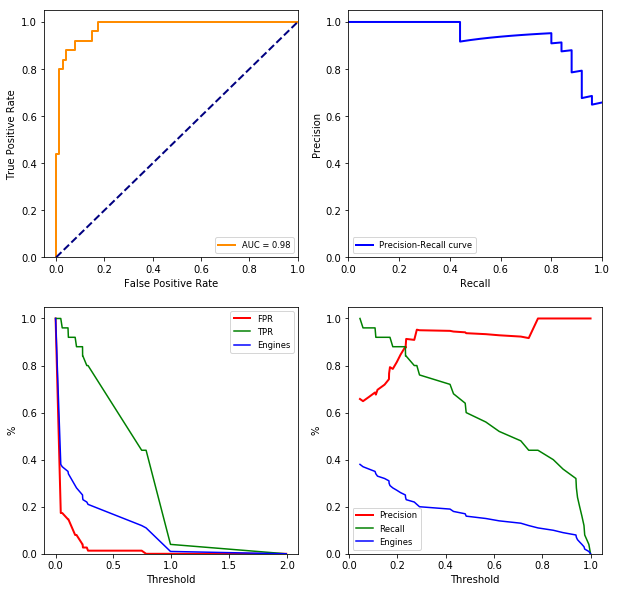

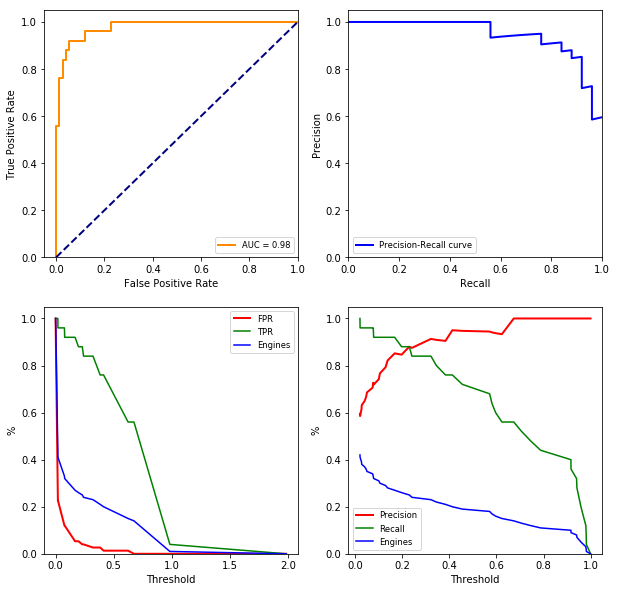

In [40]:
from sklearn.linear_model import LogisticRegression 
# Logistic Regression
model = 'Logistic Regression B'

clf_lgrb = LogisticRegression(random_state=2)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear']}
gs_score = 'roc_auc'


clf_lgrb, pred_lgrb = bin_classify(model, clf_lgrb, sensor_features, params=gs_params, score=gs_score)
print('\n Best Parameters for Linear Regression\n',clf_lgrb)
metrics_lgrb, roc_lgrb, prc_lgrb = bin_class_metrics(model, y_test, pred_lgrb.y_pred, pred_lgrb.y_score, print_out=True, plot_out=True)



model = 'Logistic Regression A'
clf_lgra = LogisticRegression(random_state=123)
gs_params = {'C': [.01, 0.1, 1.0, 10], 'solver': ['liblinear']}
gs_score = 'roc_auc'

clf_lgra, pred_lgra = bin_classify(model, clf_lgra, features_adxf, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_lgra)

metrics_lgra, roc_lgra, prc_lgra = bin_class_metrics(model, y_test, pred_lgra.y_pred, pred_lgra.y_score, print_out=True, plot_out=True)


In [41]:
metrics_lgr = pd.concat([metrics_lgrb, metrics_lgra], axis=1)
metrics_lgr

,Logistic Regression B,Logistic Regression A
Accuracy,0.880000,0.910000
Precision,0.933333,0.944444
Recall,0.560000,0.680000
F1 Score,0.700000,0.790698
ROC AUC,0.976533,0.977600


### 5.2 Decision Tree Classifier


Best Parameters:
 DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')
-----------------------------------------------------------
Decision Tree B 

Confusion Matrix:
[[74  1]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.93      0.56      0.70        25

    accuracy                           0.88       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.89      0.88      0.87       100


Metrics:
           Decision Tree B
Accuracy          0.880000
Precision         0.933333
Recall            0.

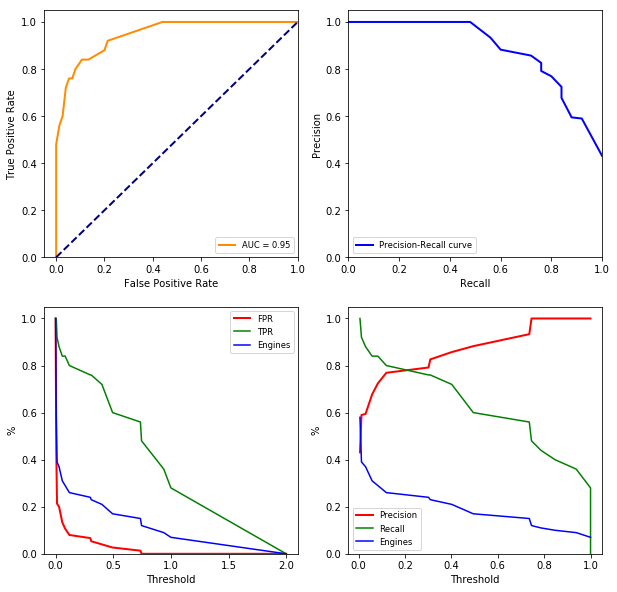

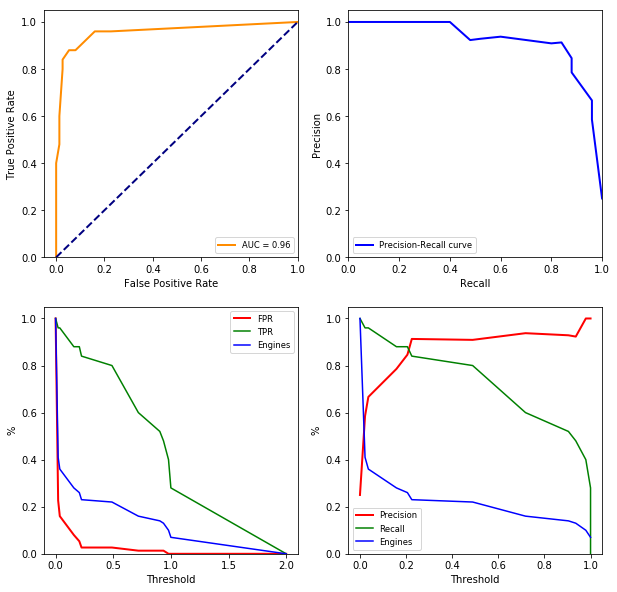

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = 'Decision Tree B'
clf_dtrb = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [2, 3, 4, 5, 6], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtrb, pred_dtrb = bin_classify(model, clf_dtrb, sensor_features, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtrb)

metrics_dtrb, roc_dtrb, prc_dtrb = bin_class_metrics(model, y_test, pred_dtrb.y_pred, pred_dtrb.y_score, print_out=True, plot_out=True)


model = 'Decision Tree A'
clf_dtra = DecisionTreeClassifier(random_state=123)
gs_params = {'max_depth': [3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_dtra, pred_dtra = bin_classify(model, clf_dtra, features_adxf, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_dtra)

metrics_dtra, roc_dtra, prc_dtra = bin_class_metrics(model, y_test, pred_dtra.y_pred, pred_dtra.y_score, print_out=True, plot_out=True)

In [44]:
metrics_dtr = pd.concat([metrics_dtrb, metrics_dtra], axis=1)
metrics_dtr

,Decision Tree B,Decision Tree A
Accuracy,0.880000,0.890000
Precision,0.933333,0.937500
Recall,0.560000,0.600000
F1 Score,0.700000,0.731707
ROC AUC,0.945067,0.957067


### 5.3 SVM

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Best Parameters:
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=123,
    shrinking=True, tol=0.001, verbose=False)
-----------------------------------------------------------
SVC B 

Confusion Matrix:
[[74  1]
 [ 9 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        75
           1       0.94      0.64      0.76        25

    accuracy                           0.90       100
   macro avg       0.92      0.81      0.85       100
weighted avg       0.90      0.90      0.89       100


Metrics:
              SVC B
Accuracy   0.900000
Precision  0.941176
Recall     0.640000
F1 Score   0.761905
ROC AUC    0.907733

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.081603   0  25  75   0  0.00  0.000000  1.000000  0.75000

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)



Best Parameters:
 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=123,
    shrinking=True, tol=0.001, verbose=False)
-----------------------------------------------------------
SVC A 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
              SVC A
Accuracy   0.910000
Precision  0.944444
Recall     0.680000
F1 Score   0.790698
ROC AUC    0.907200

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.219268   0  25  75   0  0.00  0.000000  1.000000  0.75000

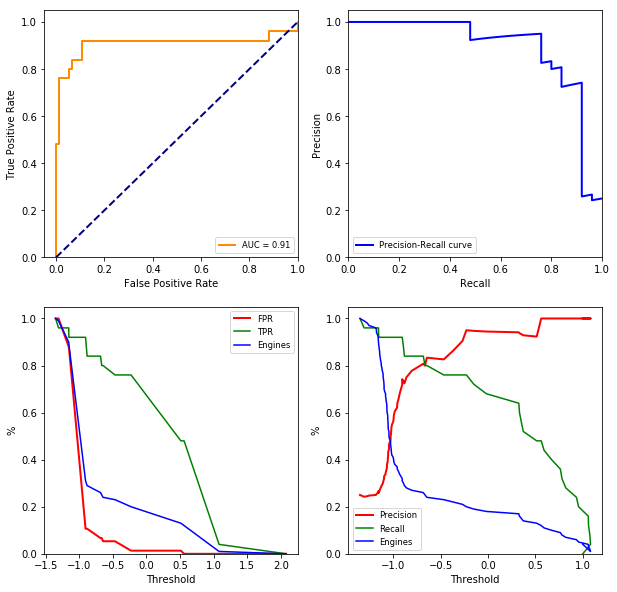

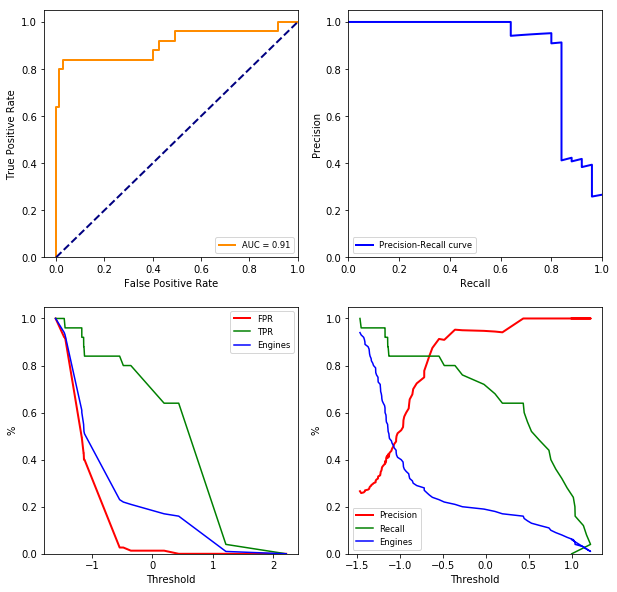

In [45]:
from sklearn.svm import SVC

model = 'SVC B'
clf_svcb = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svcb, pred_svcb = bin_classify(model, clf_svcb, sensor_features, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svcb)

metrics_svcb, roc_svcb, prc_svcb = bin_class_metrics(model, y_test, pred_svcb.y_pred, pred_svcb.y_score, print_out=True, plot_out=True)

model = 'SVC A'
clf_svca = SVC(kernel='rbf', random_state=123)
gs_params = {'C': [1.0]}
gs_score = 'roc_auc'

clf_svca, pred_svca = bin_classify(model, clf_svca, features_adxf, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svca)

metrics_svca, roc_svca, prc_svca = bin_class_metrics(model, y_test, pred_svca.y_pred, pred_svca.y_score, print_out=True, plot_out=True)

In [46]:
metrics_svc = pd.concat([metrics_svcb, metrics_svca], axis=1)
metrics_svc.sort_index()

,SVC B,SVC A
Accuracy,0.900000,0.910000
F1 Score,0.761905,0.790698
Precision,0.941176,0.944444
ROC AUC,0.907733,0.907200
Recall,0.640000,0.680000


### 5.4 Linear SVC

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Best Parameters:
 LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
          verbose=0)
-----------------------------------------------------------
SVC Linear B 

Confusion Matrix:
[[74  1]
 [11 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        75
           1       0.93      0.56      0.70        25

    accuracy                           0.88       100
   macro avg       0.90      0.77      0.81       100
weighted avg       0.89      0.88      0.87       100


Metrics:
           SVC Linear B
Accuracy       0.880000
Precision      0.933333
Recall         0.560000
F1 Score       0.700000
ROC AUC        0.972800

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.049570   0  25  75   0  0.00  0.000000

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Best Parameters:
 LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=123, tol=0.0001,
          verbose=0)
-----------------------------------------------------------
SVC Linear A 

Confusion Matrix:
[[71  4]
 [ 2 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.85      0.92      0.88        25

    accuracy                           0.94       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.94      0.94      0.94       100


Metrics:
           SVC Linear A
Accuracy       0.940000
Precision      0.851852
Recall         0.920000
F1 Score       0.884615
ROC AUC        0.977600

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.141550   0  25  75   0  0.00  0.00000

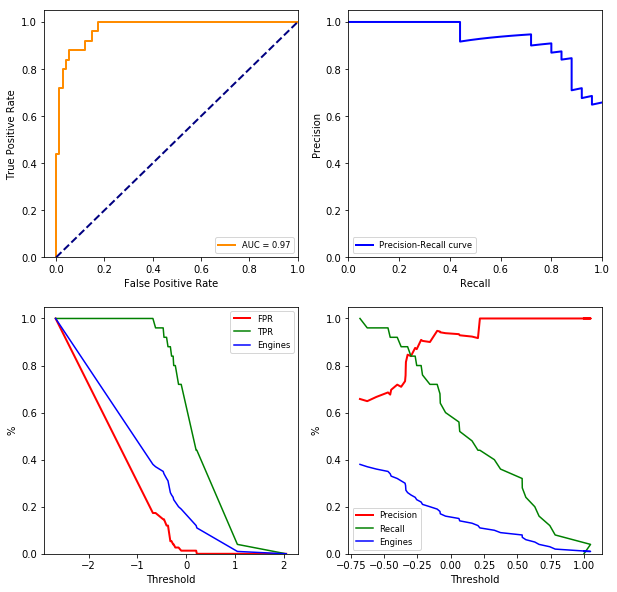

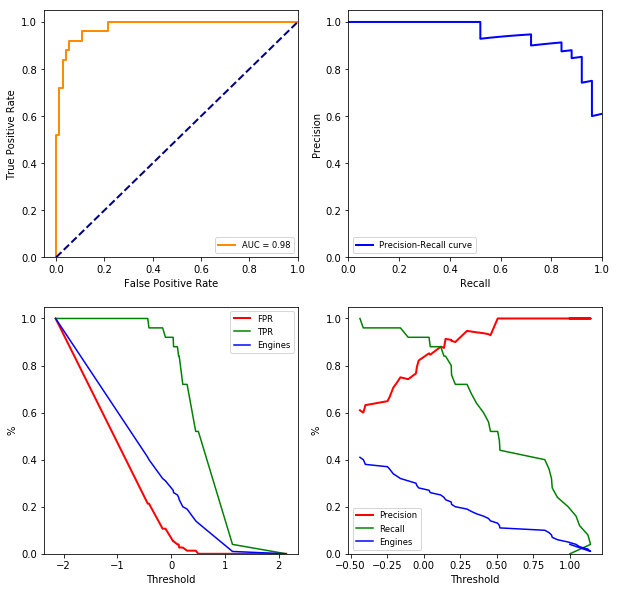

In [49]:
from sklearn.svm import LinearSVC
model = 'SVC Linear B'
clf_svlb = LinearSVC(random_state=123)
gs_params = {'C': [.01 ,.1 ,1.0]}
gs_score = 'roc_auc'

clf_svlb, pred_svlb = bin_classify(model, clf_svlb, sensor_features, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svlb)

metrics_svlb, roc_svlb, prc_svlb = bin_class_metrics(model, y_test, pred_svlb.y_pred, pred_svlb.y_score, print_out=True, plot_out=True)


model = 'SVC Linear A'
clf_svla = LinearSVC(random_state=123)
gs_params = {'C': [.001, .01 ,.1 ]}
gs_score = 'roc_auc'

clf_svla, pred_svla = bin_classify(model, clf_svla, features_adxf, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_svla)

metrics_svla, roc_svla, prc_svla = bin_class_metrics(model, y_test, pred_svla.y_pred, pred_svla.y_score, print_out=True, plot_out=True)

In [50]:
# Compare Linear SVC Before and After FE
metrics_svl = pd.concat([metrics_svlb, metrics_svla], axis=1)
metrics_svl.sort_index()

,SVC Linear B,SVC Linear A
Accuracy,0.880000,0.940000
F1 Score,0.700000,0.884615
Precision,0.933333,0.851852
ROC AUC,0.972800,0.977600
Recall,0.560000,0.920000


### 5.5 KNN


Best Parameters:
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=13, p=2,
                     weights='uniform')
-----------------------------------------------------------
KNN B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
              KNN B
Accuracy   0.910000
Precision  0.944444
Recall     0.680000
F1 Score   0.790698
ROC AUC    0.935200

ROC Thresholds:

    Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0    2.000000   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1    1.000000   5  20  75   0  0.20  0.000000  

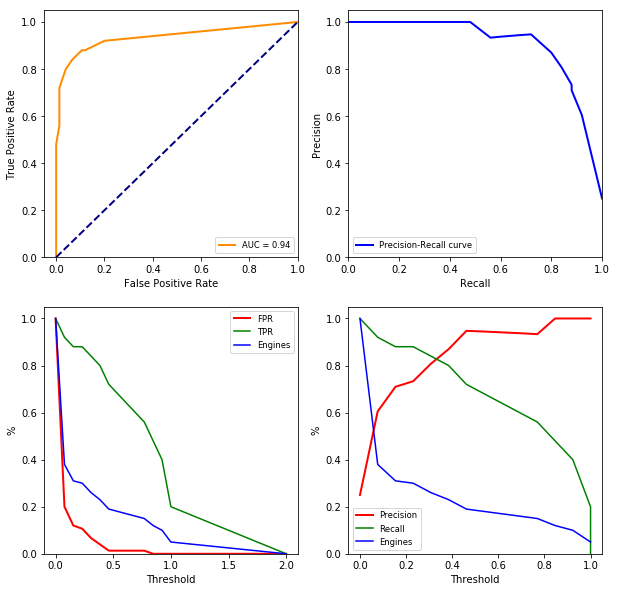

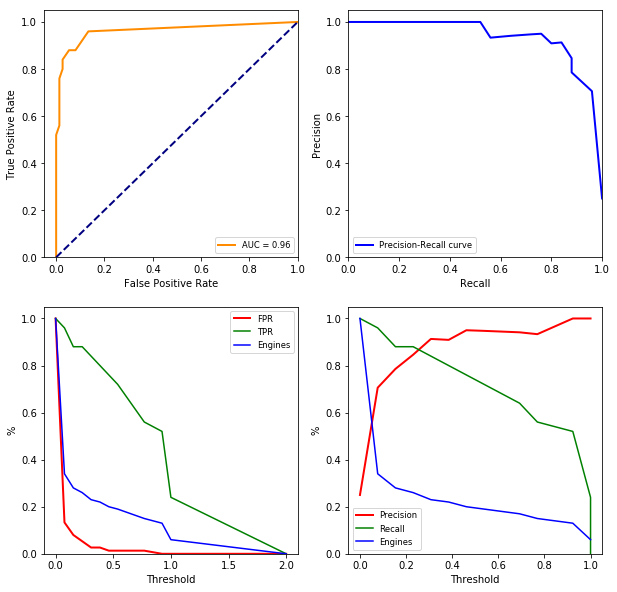

In [51]:
from sklearn.neighbors import KNeighborsClassifier

model = 'KNN B'
clf_knnb = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9, 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knnb, pred_knnb = bin_classify(model, clf_knnb, sensor_features, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knnb)

metrics_knnb, roc_knnb, prc_knnb = bin_class_metrics(model, y_test, pred_knnb.y_pred, pred_knnb.y_score, print_out=True, plot_out=True)

model = 'KNN A'
clf_knna = KNeighborsClassifier(n_jobs=-1)
gs_params = {'n_neighbors': [9 , 10, 11, 12, 13]}
gs_score = 'roc_auc'

clf_knna, pred_knna = bin_classify(model, clf_knna, features_adxf, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_knna)

metrics_knna, roc_knna, prc_knna = bin_class_metrics(model, y_test, pred_knna.y_pred, pred_knna.y_score, print_out=True, plot_out=True)

In [52]:
# Compare KNN Before and After FE
metrics_knn = pd.concat([metrics_knnb, metrics_knna], axis=1)
metrics_knn.sort_index()

,KNN B,KNN A
Accuracy,0.910000,0.920000
F1 Score,0.790698,0.818182
Precision,0.944444,0.947368
ROC AUC,0.935200,0.962400
Recall,0.680000,0.720000


### 5.6 Gaussian NB


Best Parameters:
 GaussianNB(priors=None, var_smoothing=1e-09)
-----------------------------------------------------------
Gaussian NB B 

Confusion Matrix:
[[71  4]
 [ 2 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        75
           1       0.85      0.92      0.88        25

    accuracy                           0.94       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.94      0.94      0.94       100


Metrics:
           Gaussian NB B
Accuracy        0.940000
Precision       0.851852
Recall          0.920000
F1 Score        0.884615
ROC AUC         0.987733

ROC Thresholds:

       Threshold  TP  FP  TN  FN   TPR       FPR       TNR       FNR   Que
0   2.000000e+00   0  25  75   0  0.00  0.000000  1.000000  0.750000  0.00
1   1.000000e+00   7  18  75   0  0.28  0.000000  1.000000  0.806452  0.07
2   1.000000e+00  17   8  75   0  0.68  0.000000  1.000000  0.903614 

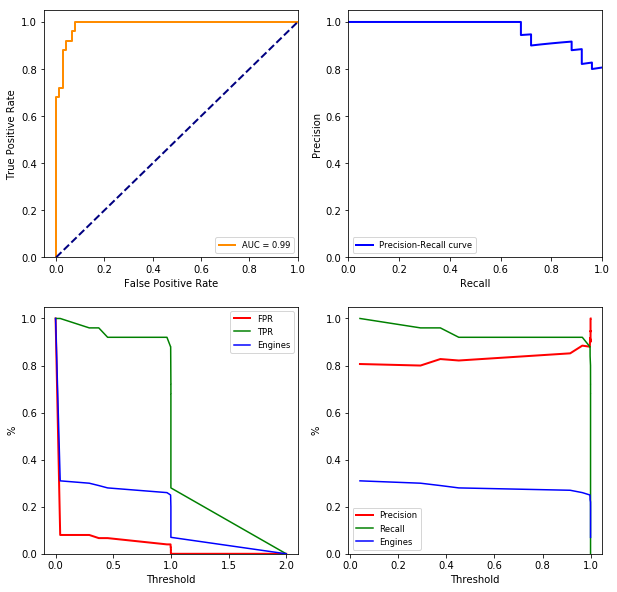

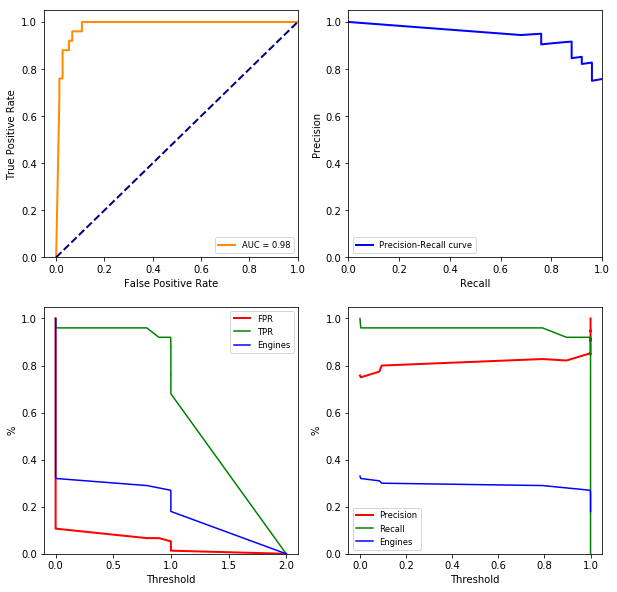

In [53]:
from sklearn.naive_bayes import GaussianNB

model = 'Gaussian NB B'
clf_gnbb = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnbb, pred_gnbb = bin_classify(model, clf_gnbb, sensor_features, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnbb)

metrics_gnbb, roc_gnbb, prc_gnbb = bin_class_metrics(model, y_test, pred_gnbb.y_pred, pred_gnbb.y_score, print_out=True, plot_out=True)


model = 'Gaussian NB A'
clf_gnba = GaussianNB()
gs_params = {} 
gs_score = 'roc_auc'

clf_gnba, pred_gnba = bin_classify(model, clf_gnba, features_adxf, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_gnba)

metrics_gnba, roc_gnba, prc_gnba = bin_class_metrics(model, y_test, pred_gnba.y_pred, pred_gnba.y_score, print_out=True, plot_out=True)

In [54]:
# Compare Naive Bayes Before and After FE
metrics_gnb = pd.concat([metrics_gnbb, metrics_gnba], axis=1)
metrics_gnb.sort_index()

,Gaussian NB B,Gaussian NB A
Accuracy,0.940000,0.940000
F1 Score,0.884615,0.888889
Precision,0.851852,0.827586
ROC AUC,0.987733,0.982133
Recall,0.920000,0.960000


### 5.7 Random Forest Classifier


Best Parameters:
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)
-----------------------------------------------------------
Random Forest B 

Confusion Matrix:
[[74  1]
 [ 8 17]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.94      0.68      0.79        25

    accuracy                           0.91       100
   macro avg       0.92      0.83      0.87       100
weighted avg       0.91      0.91      0.90       100


Metrics:
           Rando

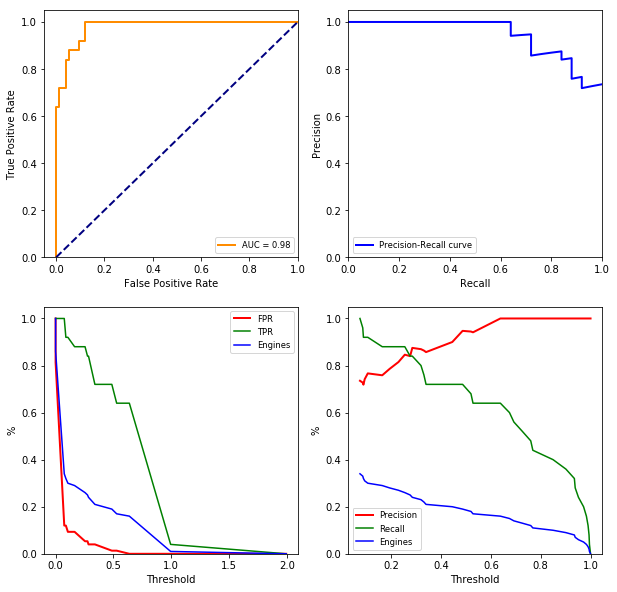

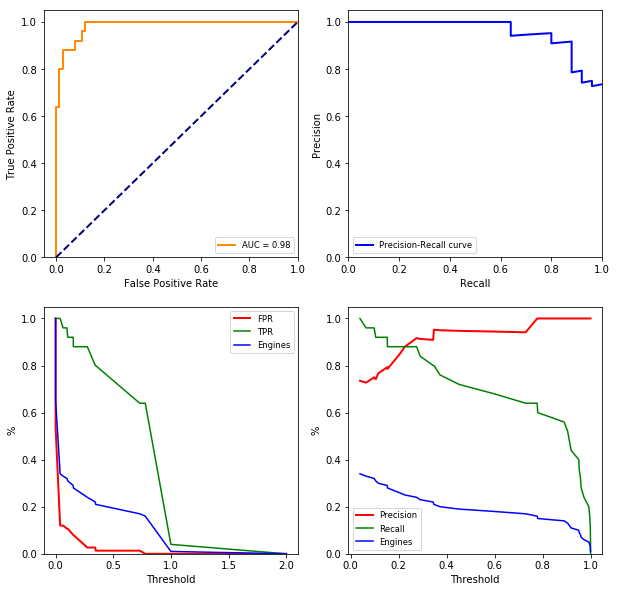

In [55]:
model = 'Random Forest B'
clf_rfcb = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfcb, pred_rfcb = bin_classify(model, clf_rfcb, sensor_features, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfcb)

metrics_rfcb, roc_rfcb, prc_rfcb = bin_class_metrics(model, y_test, pred_rfcb.y_pred, pred_rfcb.y_score, print_out=True, plot_out=True)


model = 'Random Forest A'
clf_rfca = RandomForestClassifier(n_estimators=50, random_state=123)
gs_params = {'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']}
gs_score = 'roc_auc'

clf_rfca, pred_rfca = bin_classify(model, clf_rfca, features_adxf, params=gs_params, score=gs_score)
print('\nBest Parameters:\n',clf_rfca)

metrics_rfca, roc_rfca, prc_rfca = bin_class_metrics(model, y_test, pred_rfca.y_pred, pred_rfca.y_score, print_out=True, plot_out=True)

In [56]:
metrics_rfc = pd.concat([metrics_rfcb, metrics_rfca], axis=1)
metrics_rfc

,Random Forest B,Random Forest A
Accuracy,0.910000,0.910000
Precision,0.944444,0.944444
Recall,0.680000,0.680000
F1 Score,0.790698,0.790698
ROC AUC,0.978667,0.983467


### 5.8 Compare all the Classifiers

In [57]:
#compare all models
metrics_bn = pd.concat([metrics_lgr, metrics_dtr, metrics_rfc, metrics_svc, metrics_svl, metrics_knn, metrics_gnb], axis=1)
metrics_bn

,Logistic Regression B,Logistic Regression A,Decision Tree B,Decision Tree A,Random Forest B,Random Forest A,SVC B,SVC A,SVC Linear B,SVC Linear A,KNN B,KNN A,Gaussian NB B,Gaussian NB A
Accuracy,0.880000,0.910000,0.880000,0.890000,0.910000,0.910000,0.900000,0.910000,0.880000,0.940000,0.910000,0.920000,0.940000,0.940000
Precision,0.933333,0.944444,0.933333,0.937500,0.944444,0.944444,0.941176,0.944444,0.933333,0.851852,0.944444,0.947368,0.851852,0.827586
Recall,0.560000,0.680000,0.560000,0.600000,0.680000,0.680000,0.640000,0.680000,0.560000,0.920000,0.680000,0.720000,0.920000,0.960000
F1 Score,0.700000,0.790698,0.700000,0.731707,0.790698,0.790698,0.761905,0.790698,0.700000,0.884615,0.790698,0.818182,0.884615,0.888889
ROC AUC,0.976533,0.977600,0.945067,0.957067,0.978667,0.983467,0.907733,0.907200,0.972800,0.977600,0.935200,0.962400,0.987733,0.982133


Naïve Bayes and Random Forests scored best AUC ROC. It also noticed that feature extraction has improved most models performance metrics.

Let us compare the AUC ROC and Precision-Recall curves as well

Text(0.5, 1.0, 'Precision Recall Curve')

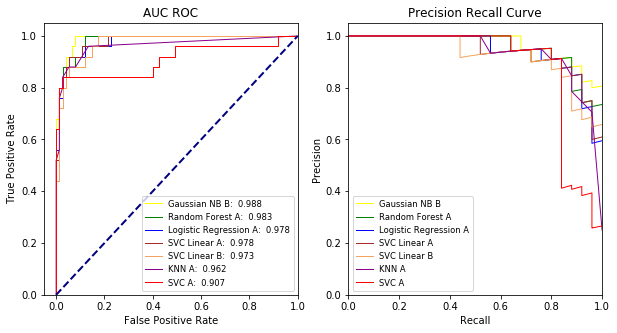

In [58]:
# Plot AUC-ROC and precision-recall curves for best models

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False )
fig.set_size_inches(10,5)

ax1.plot(roc_gnbb.FPR, roc_gnbb.TPR, color='yellow', lw=1, label= metrics_gnbb.columns.values.tolist()[0] + ':  %.3f' % metrics_gnbb.at['ROC AUC', metrics_gnbb.columns.values.tolist()[0]])
ax1.plot(roc_rfca.FPR, roc_rfca.TPR, color='green', lw=1, label= metrics_rfca.columns.values.tolist()[0] + ':  %.3f' % metrics_rfca.at['ROC AUC', metrics_rfca.columns.values.tolist()[0]])
ax1.plot(roc_lgra.FPR, roc_lgra.TPR, color='blue', lw=1, label= metrics_lgra.columns.values.tolist()[0] + ':  %.3f' % metrics_lgra.at['ROC AUC', metrics_lgra.columns.values.tolist()[0]])
ax1.plot(roc_svla.FPR, roc_svla.TPR, color='brown', lw=1, label= metrics_svla.columns.values.tolist()[0] + ':  %.3f' % metrics_svla.at['ROC AUC', metrics_svla.columns.values.tolist()[0]])
ax1.plot(roc_svlb.FPR, roc_svlb.TPR, color='sandybrown', lw=1, label= metrics_svlb.columns.values.tolist()[0] + ':  %.3f' % metrics_svlb.at['ROC AUC', metrics_svlb.columns.values.tolist()[0]])
ax1.plot(roc_knna.FPR, roc_knna.TPR, color='darkmagenta', lw=1, label= metrics_knna.columns.values.tolist()[0] + ':  %.3f' % metrics_knna.at['ROC AUC', metrics_knna.columns.values.tolist()[0]])
ax1.plot(roc_svca.FPR, roc_svca.TPR, color='red', lw=1, label= metrics_svca.columns.values.tolist()[0] + ':  %.3f' % metrics_svca.at['ROC AUC', metrics_svca.columns.values.tolist()[0]])
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlim([-0.05, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend(loc="lower right", fontsize='small')
ax1.set_title('AUC ROC')

ax2.plot(prc_gnbb.Recall, prc_gnbb.Precision, color='yellow', lw=1, label= metrics_gnbb.columns.values.tolist()[0])
ax2.plot(prc_rfca.Recall, prc_rfca.Precision, color='green', lw=1, label= metrics_rfca.columns.values.tolist()[0])
ax2.plot(prc_lgra.Recall, prc_lgra.Precision, color='blue', lw=1, label= metrics_lgra.columns.values.tolist()[0])
ax2.plot(prc_svla.Recall, prc_svla.Precision, color='brown', lw=1, label= metrics_svla.columns.values.tolist()[0])
ax2.plot(prc_svlb.Recall, prc_svlb.Precision, color='sandybrown', lw=1, label= metrics_svlb.columns.values.tolist()[0])
ax2.plot(prc_knna.Recall, prc_knna.Precision, color='darkmagenta', lw=1, label= metrics_knna.columns.values.tolist()[0])
ax2.plot(prc_svca.Recall, prc_svca.Precision, color='red', lw=1, label= metrics_svca.columns.values.tolist()[0])
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.legend(loc="lower left", fontsize='small')
ax2.set_title('Precision Recall Curve')

Binary Classification Summary:

Most of the binary classifiers showed better performance metrics with the addition of new features.

Random Forest and Naive Bayes showed same performance before and after feature engineering.

Naive Bayes and Linear SVC (with new features) scored better than other classifiers in Recall (Sensitivity) while others scored better in Precision.

Linear SVC has totally different scoring metrics before and after FE, switching between Precision and Recall !!

Although SVC (rbf) has the lowest AUC-ROC, it has the best precision-recall curve operating at threshold 0.17, giving %100 precision and %68 recall, targeting %17 of the engines

The graphs for TPR, FPR, and Engines should be linked to cost matrix of (TP, FP, TN, FN) to calculate the expected value at different operating points (thresholds) to help optimizing business decisions.

### 5.9 Expected Value Calculation

## 6. Multi Class Classification